In [1]:
import os 
# from config import config
from utils import *
from model import *
from engine import train, validate

import torch
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class config():
    seed = 429
    num_epoch = 300
    lr = 0.1
    train_batch_size = 10
    val_batch_size = 10
    # load_model = False

    in_dim = 1
    num_hidden = 1
    hidden_dim = 1
    out_dim = 1
    bin = 100
    hidden_bin = 10

    Ntrain = 100
    Nval = 100

In [3]:
# url
val_x_url = 'https://raw.githubusercontent.com/koukl/drn/master/OU_q100/test_x.dat'
val_y_url = 'https://raw.githubusercontent.com/koukl/drn/master/OU_q100/test_y.dat'
train_x_url = 'https://raw.githubusercontent.com/koukl/drn/master/OU_q100/train_x.dat'
train_y_url = 'https://raw.githubusercontent.com/koukl/drn/master/OU_q100/train_y.dat'

# load data from url
train_x_complete = load_data(train_x_url) # (2500, 100)
train_y_complete = load_data(train_y_url) # (2500, 100)
val_x_complete = load_data(val_x_url) # (2500, 100)
val_y_complete = load_data(val_y_url) # (2500, 100)

# reshape dim of data
train_x = train_x_complete[:config.Ntrain].reshape((-1, 1, config.bin)) # (200, 1, 100)
train_y = train_y_complete[:config.Ntrain].reshape((-1, 1, config.bin)) # (200, 1, 100)
val_x = val_x_complete[:config.Nval].reshape((-1, 1, config.bin)) # (100, 1, 100)
val_y = val_y_complete[:config.Nval].reshape((-1, 1, config.bin)) # (100, 1, 100)

# Convert data arrays to PyTorch tensors
train_x_tensor = torch.tensor(train_x, dtype = torch.float32)
train_y_tensor = torch.tensor(train_y, dtype = torch.float32)
val_x_tensor = torch.tensor(val_x, dtype = torch.float32)
val_y_tensor = torch.tensor(val_y, dtype = torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(train_x_tensor, train_y_tensor)
val_dataset = TensorDataset(val_x_tensor, val_y_tensor)

train_loader = DataLoader(train_dataset, batch_size = config.train_batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = config.val_batch_size, shuffle = False)

In [4]:
# Model Initialization
seed_everything(config.seed)
model = CustomNet(config.in_dim, config.num_hidden, config.hidden_dim, config.out_dim, config.bin, config.hidden_bin)
# criterion = nn.MSELoss()
criterion = JSLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = config.lr) # weight_decay
train_losses = []
val_losses = []

# Training Loop
for epoch in range(config.num_epoch):
  train_loss = train(model, train_loader, criterion, optimizer, config.num_epoch, epoch)
  train_losses.append(train_loss)
  val_loss = validate(model, val_loader, criterion, config.num_epoch, epoch)
  val_losses.append(val_loss)

print('Finished Training and Testing, YAY!!!!!')

Epoch [1/300]  Training Loss: 0.353673
Epoch [1/300] Validation Loss: 0.330665
Epoch [2/300]  Training Loss: 0.326176
Epoch [2/300] Validation Loss: 0.303746
Epoch [3/300]  Training Loss: 0.300064
Epoch [3/300] Validation Loss: 0.279184
Epoch [4/300]  Training Loss: 0.279427
Epoch [4/300] Validation Loss: 0.259012
Epoch [5/300]  Training Loss: 0.257775
Epoch [5/300] Validation Loss: 0.246933
Epoch [6/300]  Training Loss: 0.247092
Epoch [6/300] Validation Loss: 0.229391
Epoch [7/300]  Training Loss: 0.228694
Epoch [7/300] Validation Loss: 0.215296
Epoch [8/300]  Training Loss: 0.215263
Epoch [8/300] Validation Loss: 0.204600
Epoch [9/300]  Training Loss: 0.215835
Epoch [9/300] Validation Loss: 0.233688
Epoch [10/300]  Training Loss: 0.199753
Epoch [10/300] Validation Loss: 0.192045
Epoch [11/300]  Training Loss: 0.194753
Epoch [11/300] Validation Loss: 0.179407
Epoch [12/300]  Training Loss: 0.191269
Epoch [12/300] Validation Loss: 0.178702
Epoch [13/300]  Training Loss: 0.177894
Epoch 

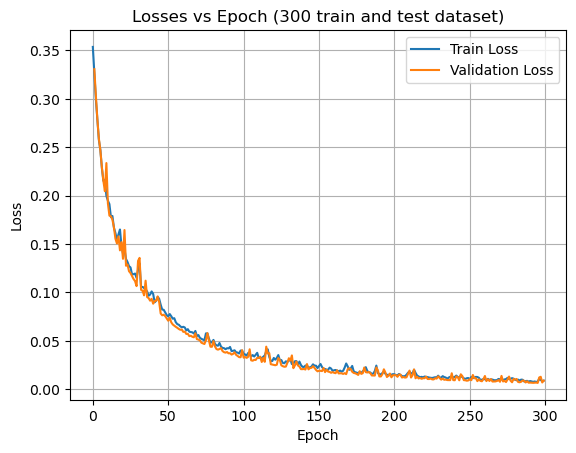

In [5]:
sns.lineplot(train_losses, label = 'Train Loss')
# sns.lineplot(val_losses, label = 'Validation Loss')
sns.lineplot([None] + val_losses[:-1], label = 'Validation Loss') # Shifting validation loss by 1 epoch
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Losses vs Epoch ({config.num_epoch} train and test dataset)')
plt.legend()
plt.grid(True)
plt.show()